# Coursera - Applied Data Science Capstone

### This Notebook will be mainly used for the Applied Data Science Capstone project from Coursera

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Week 4 - The Battle of Neighborhoods

## 1. Problem Statement

### 1.1 Introduction

In this project we are going to identify the best suitable location to open an Asian Restaurant in the Toronto Neighbourhood

### 1.2 Business Problem:

Client seeks to establish a franchised Asian restaurant in a Toronto neighborhood. Which neighborhood would appear to be the optimal and most strategic location for the business.

A client seeks to establish a franchised Asian restaurant in a Toronto neighborhood. Which neighbourhood would appear to be the optimal and most strategic location for the business operations? The objective of this capstone project is to locate the optimal neighborhood for operation. Our foundation of reasoning would be based off of spending power, distribution of ethnic group, and competition, across each neighbourhood. We will mainly be utilizing the Foursquare API and the extensive geographical and census data from Toronto's Open Data Portal.

### 1.3 Data

#### We are going to extract Datafrom multiple sources mentioned below along the data fields being extract from each source


Neighbourhood names, alongside their corresponding boroughs and postal codes, scraped from Wikipedia: (https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050)
* Neighborhood Name
* Postal Code

The Toronto's census data for its social demographic characteristics will be distilled from Toronto's Neighborhood Profile (https://bit.ly/2ZivgPg).
* Total Population
* Southeast Asina Population
* Income

Geographical coordinates of each neighbourhood: (https://cocl.us/Geospatial_data)
* Latitude
* Longitude

The Foursquare API will be used to explore neighborhoods in Toronto, more specifically, we will be using the explore function to get the most common venue categories in each neighborhood.
* Venue
* Venue Category
* Venue Latitude
* Venue Longitude

# Week 5 - The Battle of Neighborhoods

## 2. Exploratory Data Analysis

### 2.1 Import Data

In [3]:
Toronto_Census = pd.read_csv('wellbeing_toronto.csv')
Toronto_Census.head()

,Neighbourhood Id,Neighbourhood,After-Tax Household Income,Total Population,Southeast Asian
0,1,West Humber-Clairville,59703,33312,490
1,2,Mount Olive-Silverstone-Jamestown,46986,32954,590
2,3,Thistletown-Beaumond Heights,57522,10360,120
3,4,Rexdale-Kipling,51194,10529,170
4,5,Elms-Old Rexdale,49425,9456,370


In [4]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [5]:
df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]
df = df[df.Borough!='Not assigned']
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


### 2.2 Merge all dataframes

In [6]:
df = pd.merge(df, df_geo, left_on='Postcode', right_on='Postal Code').drop(['Postal Code', 'Postcode', 'Borough'], axis=1)
df = pd.merge(df, Toronto_Census, on='Neighbourhood', how='left').dropna(how='any', axis=0).reset_index(drop=True)
df.head()

,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Total Population,Southeast Asian
0,Victoria Village,43.725882,-79.315572,43.0,43743.0,17510.0,95.0
1,Rouge,43.806686,-79.194353,131.0,72784.0,46496.0,295.0
2,Malvern,43.806686,-79.194353,132.0,53425.0,43794.0,200.0
3,Highland Creek,43.784535,-79.160497,134.0,87321.0,12494.0,85.0
4,Flemingdon Park,43.725900,-79.340923,44.0,43511.0,21933.0,230.0


In [7]:
df.rename(columns={'   Southeast Asian': 'Southeast Asian'}, inplace=True)
df.columns

Index(['Neighbourhood', 'Latitude', 'Longitude', 'Neighbourhood Id',
       'After-Tax Household Income', 'Total Population', 'Southeast Asian'],
      dtype='object')

### 2.3 Get Population percentage of Southeast Asians

In [8]:
df['Percentage of Southeast Asian'] = df['Southeast Asian'] / df['Total Population'] * 100
df.drop(['Total Population', 'Southeast Asian'], axis=1, inplace=True)
df.head()

,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian
0,Victoria Village,43.725882,-79.315572,43.0,43743.0,0.542547
1,Rouge,43.806686,-79.194353,131.0,72784.0,0.634463
2,Malvern,43.806686,-79.194353,132.0,53425.0,0.456684
3,Highland Creek,43.784535,-79.160497,134.0,87321.0,0.680327
4,Flemingdon Park,43.725900,-79.340923,44.0,43511.0,1.048648


### 2.4 Create Folium Map

In [9]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [10]:
# get location of Toronto using geopy
from geopy.geocoders import Nominatim
address = 'Toronto'
geolocator = Nominatim(user_agent='to_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Toronto are {}, {}".format(latitude, longitude))

The geographical coordinates of Toronto are 43.6534817, -79.3839347


In [11]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Folium mapping
import folium
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighbourhood in zip(df['Latitude'], df['Longitude'], df['Neighbourhood']):
  label = '{}'.format(neighbourhood)
  label = folium.Popup(label)
  folium.CircleMarker(
      [lat,lng],
      radius=8,
      color='blue',
      popup=label,
      fill_color='#3186cc',
      fill_opacity=0.7,
      fill=True

  ).add_to(map_Toronto)

map_Toronto

### 2.5 Save Froursquare API Credentials

In [15]:
# @hidden_cell
CLIENT_ID = 'F53QVGYFG0FL4ZHQSR5JVYQKTOUSTXPRSU0GEZUF5W5RL5QF' # your Foursquare ID
CLIENT_SECRET = 'QLCVJODUQ3AZVZ2CC3YGROFIM1UJ2MU23MYH1055DBCJGAZZ' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F53QVGYFG0FL4ZHQSR5JVYQKTOUSTXPRSU0GEZUF5W5RL5QF
CLIENT_SECRET:QLCVJODUQ3AZVZ2CC3YGROFIM1UJ2MU23MYH1055DBCJGAZZ


### 2.6 Define function to explore top nearby venues

In [19]:
import requests
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

def getNearbyVenues(names, latitudes, longitudes, radius=1500):
  venues_list = []
  for name, lat, lng in zip(names, latitudes, longitudes):
    print(name)

    #create the API request url
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        LIMIT
    )

    # make the GET request
    results = requests.get(url).json()['response']['groups'][0]['items']

    # return only relevant information for each nearby venue
    venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results
        ])
  
  nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
  nearby_venues.columns = ['Neighbourhood',
                           'Neighbourhood Latitude',
                           'Neighbourhood Longitude',
                           'Venue',
                           'Venue Latitude',
                           'Venue Longitude',
                           'Venue Category']

  return(nearby_venues)

In [28]:
# run the function above to each neighborhood and create a new dataframe called manhattan_venues
Toronto_venues = getNearbyVenues(names=df['Neighbourhood'],
                                 latitudes=df['Latitude'],
                                 longitudes=df['Longitude'])

Victoria Village
Rouge
Malvern
Highland Creek
Flemingdon Park
Humewood-Cedarvale
Markland Wood
Guildwood
Morningside
West Hill
The Beaches
Woburn
Hillcrest Village
Bathurst Manor
Thorncliffe Park
Scarborough Village
Henry Farm
Little Portugal
Ionview
Kennedy Park
Bayview Village
Oakridge
Humber Summit
Cliffcrest
Mount Dennis
Weston
Dorset Park
Forest Hill North
Willowdale West
Roncesvalles
Agincourt North
Milliken
New Toronto
Alderwood
Long Branch


In [29]:
Toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
1,Victoria Village,43.725882,-79.315572,Sultan Of Samosas,43.718823,-79.304350,Indian Restaurant
2,Victoria Village,43.725882,-79.315572,Aga Khan Museum,43.725105,-79.332076,History Museum
3,Victoria Village,43.725882,-79.315572,Jatujak,43.736208,-79.307668,Thai Restaurant
4,Victoria Village,43.725882,-79.315572,Armenian Kitchen,43.731071,-79.305390,Middle Eastern Restaurant


### 2.7 One-Hot Encoding

In [31]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighbourhood'] = Toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,American Restaurant,Amphitheater,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
Toronto_grouped = Toronto_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped = Toronto_grouped[['Neighbourhood', 'Asian Restaurant']]
Toronto_grouped.set_index('Neighbourhood', inplace=True)

#### Analyze Neighbourhoods by Number of restaurants

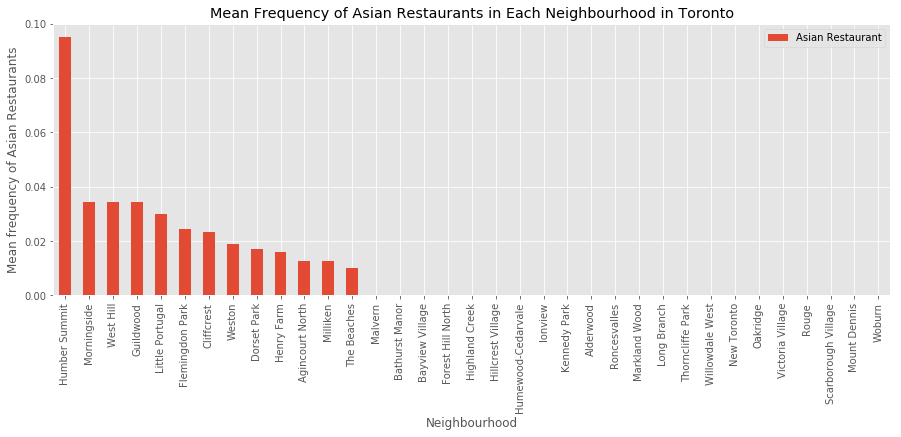

In [35]:
Toronto_grouped.sort_values(by='Asian Restaurant', ascending=False, inplace=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
Toronto_grouped.plot(kind='bar', figsize=(15,5))

plt.title('Mean Frequency of Asian Restaurants in Each Neighbourhood in Toronto')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean frequency of Asian Restaurants')

plt.show()

#### Analyze neighbourhood by population

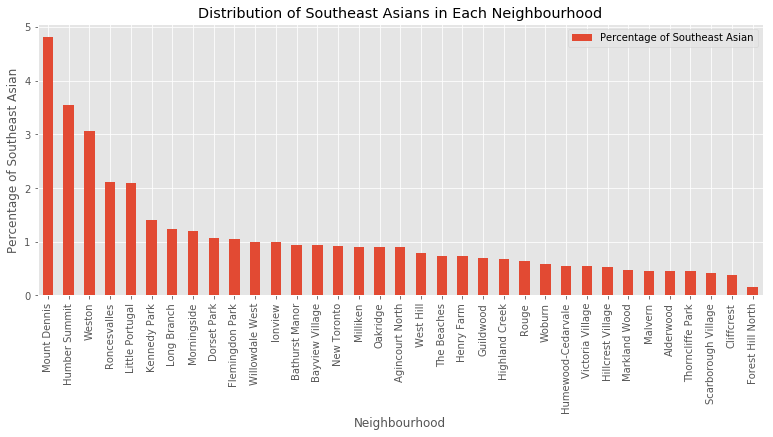

In [36]:
df_ethnic = df[['Neighbourhood', 'Percentage of Southeast Asian']].set_index('Neighbourhood')

# sort by descending order
df_ethnic.sort_values(by='Percentage of Southeast Asian', ascending=False, inplace=True)

#plot bar graph
df_ethnic.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Southeast Asians in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of Southeast Asian')

plt.show()

#### Analyze Neighbourhood by income

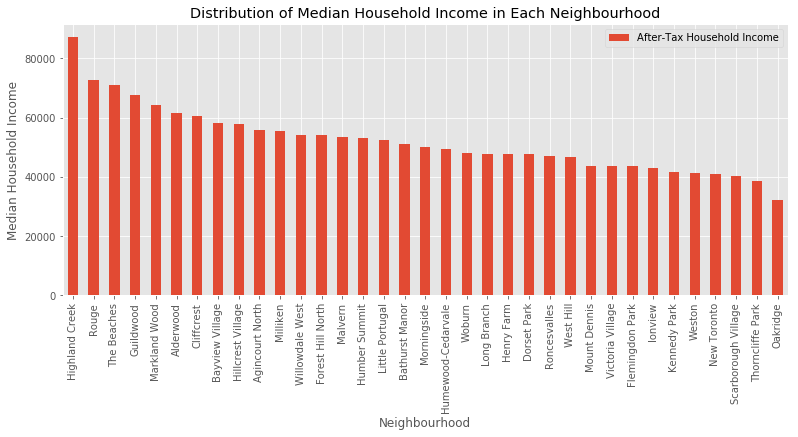

In [38]:
df_income = df[['Neighbourhood', 'After-Tax Household Income']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='After-Tax Household Income', ascending=False, inplace=True)

#plot bar graph
df_income.plot(kind='bar', figsize=(13,5))
plt.title('Distribution of Median Household Income in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Household Income')

plt.show()

### 2.8 Create Final dataframe

In [40]:
# merge df with toronto_grouped
df_final = pd.merge(df, Toronto_grouped, on='Neighbourhood')
df_final.head()

,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian,Asian Restaurant
0,Victoria Village,43.725882,-79.315572,43.0,43743.0,0.542547,0.00000
1,Rouge,43.806686,-79.194353,131.0,72784.0,0.634463,0.00000
2,Malvern,43.806686,-79.194353,132.0,53425.0,0.456684,0.00000
3,Highland Creek,43.784535,-79.160497,134.0,87321.0,0.680327,0.00000
4,Flemingdon Park,43.725900,-79.340923,44.0,43511.0,1.048648,0.02439


## 3. Clustering

### 3.1 Normalize fields
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [48]:
from sklearn.preprocessing import StandardScaler
X = df_final.values[:,4:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.76318401, -0.58195085, -0.55646168],
       [ 1.89181483, -0.48520087, -0.55646168],
       [ 0.12196797, -0.67233002, -0.55646168],
       [ 3.22082273, -0.43692551, -0.55646168],
       [-0.78439402, -0.04923364,  0.7487196 ],
       [-0.25953784, -0.56683351, -0.55646168],
       [ 1.11591265, -0.65436181, -0.55646168],
       [ 1.4250119 , -0.41005069,  1.28879462],
       [-0.18484571,  0.11333426,  1.28879462],
       [-0.48343137, -0.32685174,  1.28879462],
       [ 1.72478605, -0.37214108, -0.02133736],
       [-0.38240958, -0.53310743, -0.55646168],
       [ 0.51115327, -0.59360511, -0.55646168],
       [-0.09278332, -0.15833173, -0.55646168],
       [-1.22925557, -0.67929527, -0.55646168],
       [-1.08883072, -0.71245837, -0.55646168],
       [-0.40517377, -0.38315284,  0.29294201],
       [ 0.03913925,  1.04564485,  1.0489113 ],
       [-0.83376213, -0.11132032, -0.55646168],
       [-0.94301194,  0.32230495, -0.55646168],
       [ 0.54278543, -0.1691174 , -0.556

In [49]:
df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'Household Income', 1:'% Southeast Asian', 2:'No. of Asian Restaurants'}, inplace=True)
df_normalized.head()

,Household Income,% Southeast Asian,No. of Asian Restaurants
0,-0.763184,-0.581951,-0.556462
1,1.891815,-0.485201,-0.556462
2,0.121968,-0.672330,-0.556462
3,3.220823,-0.436926,-0.556462
4,-0.784394,-0.049234,0.748720


### 3.2 Finding Optimal k value for clustering

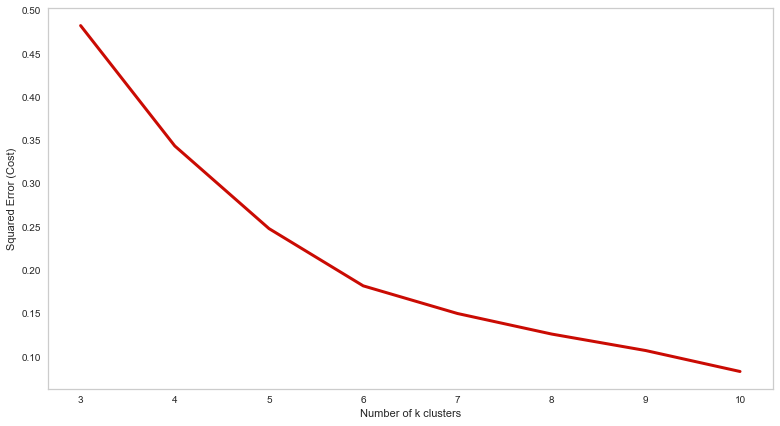

In [50]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 11):
  KM = KMeans(n_clusters=i, max_iter=100)
  try:
    KM.fit(df_normalized)

  except ValueError:
    print('Error on line', i)

  # calculate squared error for the clustered points
  error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,11), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

In [46]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A62B5E630>,
         k=None, locate_elbow=True, metric='distortion', model=None,
         timings=True)

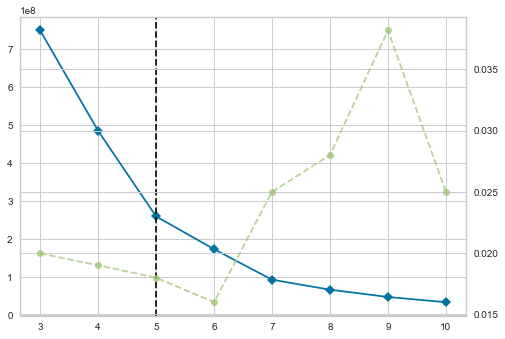

In [51]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,11))

visualizer.fit(X)
visualizer

After analysing using elbow method using distortion score & Squared error for each K value, looks like K = 6 is the best value.

### 3.3. Clustering the Toronto Neighborhood Using K-Means with K = 6¶

In [52]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_normalized)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 5, 3, 5, 4, 0, 3, 5, 4, 4])

In [53]:
df_normalized.drop(['Household Income', '% Southeast Asian'], axis=1, inplace=True)
df_clustered = pd.merge(df, df_normalized, left_index=True, right_index=True)
df_clustered.insert(0, 'Cluster Label', kmeans.labels_)

#### Visulize the clusters on a map

In [54]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color schemes for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Neighbourhood'], df_clustered['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 4. Examine clusters

### 4.1. Cluster 0

In [56]:
df_clustered.loc[df_clustered['Cluster Label'] == 0]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
0,0,Victoria Village,43.725882,-79.315572,43.0,43743.0,0.542547,-0.556462
5,0,Humewood-Cedarvale,43.693781,-79.428191,106.0,49252.0,0.556909,-0.556462
11,0,Woburn,43.770992,-79.216917,137.0,47908.0,0.588950,-0.556462
14,0,Thorncliffe Park,43.705369,-79.349372,55.0,38645.0,0.450066,-0.556462
15,0,Scarborough Village,43.744734,-79.239476,139.0,40181.0,0.418560,-0.556462
18,0,Ionview,43.727929,-79.262029,125.0,42971.0,0.989664,-0.556462
19,0,Kennedy Park,43.727929,-79.262029,124.0,41776.0,1.401624,-0.556462
21,0,Oakridge,43.711112,-79.284577,121.0,32079.0,0.902853,-0.556462
29,0,Roncesvalles,43.648960,-79.456325,86.0,46883.0,2.103646,-0.556462
32,0,New Toronto,43.605647,-79.501321,18.0,40859.0,0.915991,-0.556462


### 4.2. Cluster 1

In [57]:
df_clustered.loc[df_clustered['Cluster Label'] == 1]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
22,1,Humber Summit,43.756303,-79.565963,21.0,53272.0,3.543814,4.53996


### 4.3. Cluster 2

In [58]:
df_clustered.loc[df_clustered['Cluster Label'] == 2]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
24,2,Mount Dennis,43.691116,-79.476013,115.0,43790.0,4.818657,-0.556462
25,2,Weston,43.706876,-79.518188,113.0,41356.0,3.056914,0.453207


### 4.4. Cluster 3

In [59]:
df_clustered.loc[df_clustered['Cluster Label'] == 3]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
2,3,Malvern,43.806686,-79.194353,132.0,53425.0,0.456684,-0.556462
6,3,Markland Wood,43.643515,-79.577201,12.0,64297.0,0.473754,-0.556462
12,3,Hillcrest Village,43.803762,-79.363452,48.0,57682.0,0.531475,-0.556462
13,3,Bathurst Manor,43.754328,-79.442259,34.0,51076.0,0.945001,-0.556462
20,3,Bayview Village,43.786947,-79.385975,52.0,58028.0,0.934754,-0.556462
23,3,Cliffcrest,43.716316,-79.239476,123.0,60384.0,0.376530,0.688013
27,3,Forest Hill North,43.696948,-79.411307,102.0,53978.0,0.156177,-0.556462
28,3,Willowdale West,43.782736,-79.442259,37.0,54226.0,1.003779,-0.556462
30,3,Agincourt North,43.815252,-79.284577,129.0,55893.0,0.893072,0.129595
31,3,Milliken,43.815252,-79.284577,130.0,55464.0,0.903206,0.129595


### 4.5. Cluster 4

In [60]:
df_clustered.loc[df_clustered['Cluster Label'] == 4]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
4,4,Flemingdon Park,43.725900,-79.340923,44.0,43511.0,1.048648,0.748720
8,4,Morningside,43.763573,-79.188711,135.0,50069.0,1.203094,1.288795
9,4,West Hill,43.763573,-79.188711,136.0,46803.0,0.784901,1.288795
16,4,Henry Farm,43.778517,-79.346556,53.0,47659.0,0.731413,0.292942
17,4,Little Portugal,43.647927,-79.419750,84.0,52519.0,2.088823,1.048911
26,4,Dorset Park,43.757410,-79.273304,126.0,47630.0,1.059873,0.366166


### 4.6. Cluster 5

In [61]:
df_clustered.loc[df_clustered['Cluster Label'] == 5]

,Cluster Label,Neighbourhood,Latitude,Longitude,Neighbourhood Id,After-Tax Household Income,Percentage of Southeast Asian,No. of Asian Restaurants
1,5,Rouge,43.806686,-79.194353,131.0,72784.0,0.634463,-0.556462
3,5,Highland Creek,43.784535,-79.160497,134.0,87321.0,0.680327,-0.556462
7,5,Guildwood,43.763573,-79.188711,140.0,67678.0,0.705859,1.288795
10,5,The Beaches,43.676357,-79.293031,63.0,70957.0,0.741874,-0.021337
